# Deep Learning Homework 01 TensorFlow (part1)

### Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [43]:
import pandas as pd

data = pd.read_csv('diabetes.csv') # Import the data

data.head() # To see the first few columns 

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


### Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Add this import
from scipy import stats

In [45]:
print("This is to find the missing values")
print(data.isnull().sum())

# Impute missing values (if any) with the median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


This is to find the missing values
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64


In [46]:
print("The statistics after imputation")
print(data_imputed.describe())

# Find and handle outliers using Z-score method
z_scores = np.abs(stats.zscore(data_imputed.iloc[:, :-1]))  # Exclude the label column for outlier detection
threshold = 3  # This is the threshold for outliers
outliers = np.where(z_scores > threshold)

# This is to remove outliers
data_cleaned = data_imputed[(z_scores < threshold).all(axis=1)]
print(f"\nData shape after outlier removal: {data_cleaned.shape}")

The statistics after imputation
        -0.294118    0.487437    0.180328   -0.292929           0  0.00149028  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    -0.407807    0.218208    0.176500   -0.289731   -0.323961   -0.032289   
std      0.386493    0.306465    0.201420    0.258651    0.375608    0.205508   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.179583   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         -0.53117  -0.0333333         0.1  
count  758.000000  758.000000  758.000000  
mean    -0.663427   -0.516799    0.654354  
std      0.283202    0.400674    0.475893  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241 

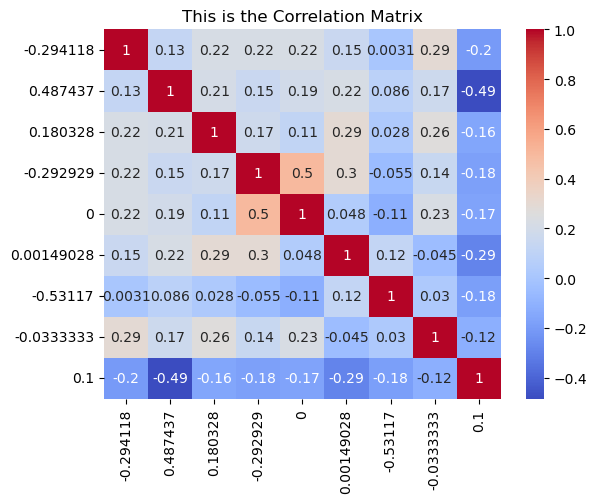

In [47]:
#Correlation matrix after preprocessing
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("This is the Correlation Matrix")
plt.show()

In [48]:
X = data_cleaned.iloc[:, :-1].values  # Features
y = data_cleaned.iloc[:, -1].values  # Labels

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (584, 8), y_train: (584,)
Test set shape: X_test: (147, 8), y_test: (147,)


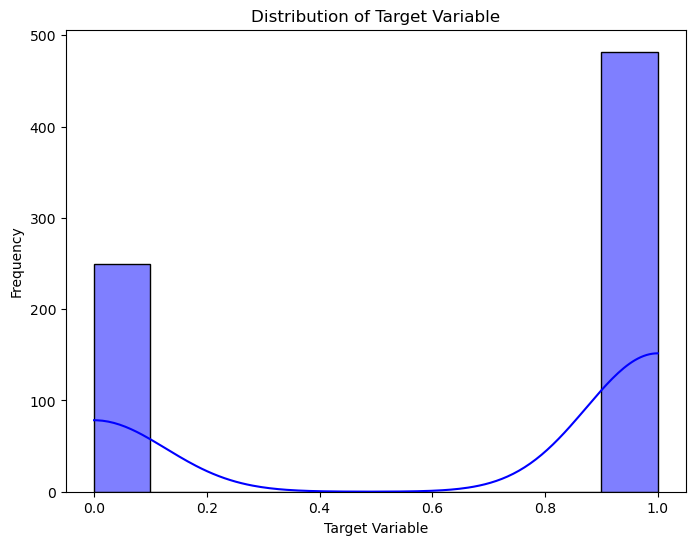

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color="blue", bins=10)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.show()


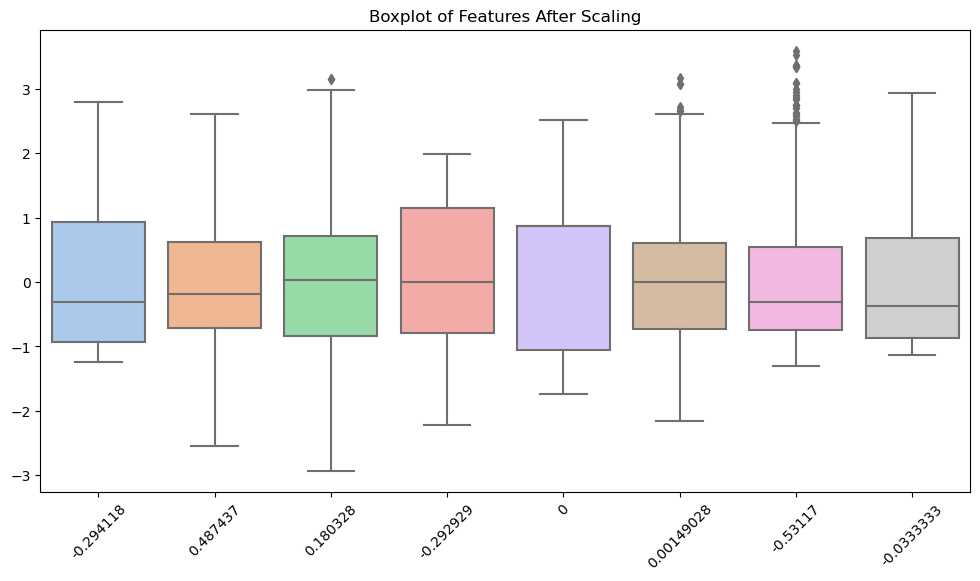

In [50]:
# Boxplot of features after scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=data_cleaned.columns[:-1]), palette='pastel')
plt.xticks(rotation=45)
plt.title("Boxplot of Features After Scaling")
plt.show()

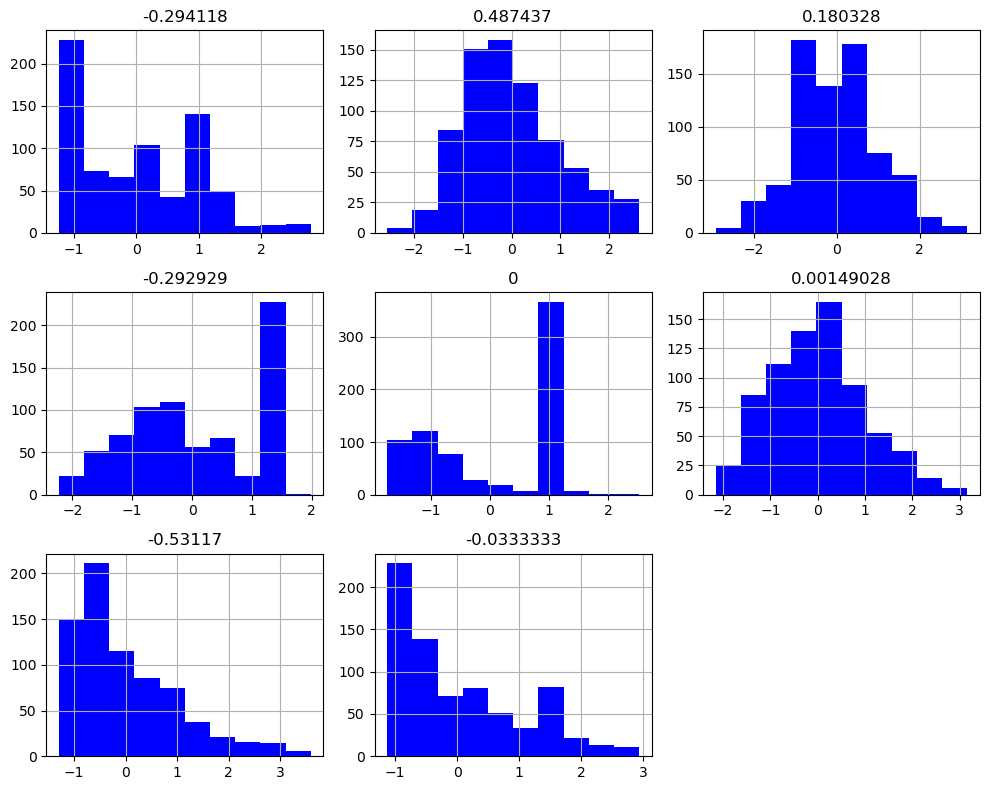

In [51]:
# Histograms for each feature after preprocessing
pd.DataFrame(X_scaled, columns=data_cleaned.columns[:-1]).hist(figsize=(10, 8), bins=10, color='blue')
plt.tight_layout()
plt.show()


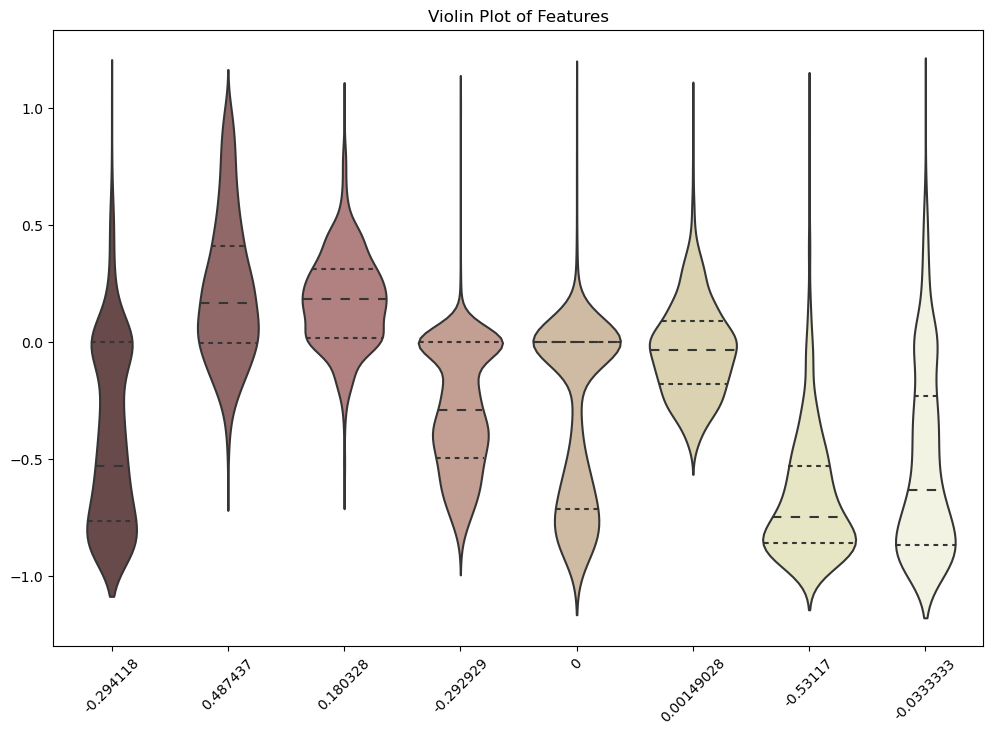

In [52]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data.iloc[:, :-1], palette="pink", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of Features")
plt.show()

### Step 3. Split into 70% train 30% test

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 4. Modify the model shown in the demo to take the new data

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Define the model based on the demo to take new data
model = Sequential([
    Dense(16, input_dim=8, activation='relu'),  # Input layer with 8 features
    Dense(8, activation='relu'),                # Hidden layer
    Dense(1, activation='sigmoid')              # Output layer (binary classification)
])


/Users/ananyamudunuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 5. Train the model on the data

In [55]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6330 - loss: 0.6710 - val_accuracy: 0.6311 - val_loss: 0.6354
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.6645 - loss: 0.6359 - val_accuracy: 0.6311 - val_loss: 0.6073
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6290 - loss: 0.6170 - val_accuracy: 0.6408 - val_loss: 0.5877
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.6247 - loss: 0.6053 - val_accuracy: 0.6505 - val_loss: 0.5701
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.6607 - loss: 0.5867 - val_accuracy: 0.6796 - val_loss: 0.5522
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.6920 - loss: 0.5683 - val_accuracy: 0.7087 - val_loss: 0.5393
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7170 - loss: 0.5649 - val_accuracy: 0.7282 - val_loss: 0.5242
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7511 - loss: 0.5393 - val_accuracy: 0.77

### Step 6. Make predictions on the test data and compare them to the test labels

In [57]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [58]:
# Compare to test labels
print(y_pred[:10])
print(y_test[:10])

[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
[0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


### Step 7. Calculate the accuracy of your results

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test data: {accuracy:.2f}")


Accuracy on the test data: 0.79


In [60]:
# Display the first few predictions and actual labels
print("Predictions:", y_pred[:10])
print("Actual Labels:", y_test[:10])

Predictions: [[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
Actual Labels: [0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


### Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

 Hypothesis:

	•	Hypothesis 1: Double the no# of neurons in each hidden layer.
	•	Hypothesis 2: Add another hidden layer.

### Step 9. Test your hypothesis by training your new models

In [61]:
from sklearn.metrics import accuracy_score

# Hypothesis 1: Double the no# of neurons in each hidden layer.
model_hypothesis_1 = Sequential([
    Dense(32, input_dim=8, activation='relu'),  # First hidden layer with 32 neurons
    Dense(16, activation='relu'),               # Second hidden layer with 16 neurons
    Dense(1, activation='sigmoid')              # Output layer
])

# Compile the model
model_hypothesis_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_hypothesis_1 = model_hypothesis_1.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Test predictions
y_pred_hypothesis_1 = (model_hypothesis_1.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy_hypothesis_1 = accuracy_score(y_test, y_pred_hypothesis_1)
print(f"Accuracy for Hypothesis 1 (double neurons): {accuracy_hypothesis_1:.2f}")



Epoch 1/50


/Users/ananyamudunuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5663 - loss: 0.6823 - val_accuracy: 0.6311 - val_loss: 0.6275
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.6342 - loss: 0.6294 - val_accuracy: 0.6311 - val_loss: 0.5867
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.6701 - loss: 0.5846 - val_accuracy: 0.6893 - val_loss: 0.5549
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.7213 - loss: 0.5586 - val_accuracy: 0.7476 - val_loss: 0.5339
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.7348 - loss: 0.5448 - val_accuracy: 0.7961 - val_loss: 0.5160
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.7435 - loss: 0.5373 - val_accuracy: 0.7864 - val_loss: 0.5004
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.7386 - loss: 0.4935 - val_accuracy: 0.7767 - val_loss: 0.4920
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.7232 - loss: 0.5161 - val_accuracy: 0.7864 - val_lo

In [62]:
# Hypothesis 2: Add another hidden layer
model_hypothesis_2 = Sequential([
    Dense(16, input_dim=8, activation='relu'),  # First hidden layer
    Dense(16, activation='relu'),               # Second hidden layer
    Dense(16, activation='relu'),               # Third hidden layer
    Dense(1, activation='sigmoid')              # Output layer
])

# Compile the model
model_hypothesis_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_hypothesis_2 = model_hypothesis_2.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Test predictions
y_pred_hypothesis_2 = (model_hypothesis_2.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy_hypothesis_2 = accuracy_score(y_test, y_pred_hypothesis_2)
print(f"Accuracy for Hypothesis 2 (additional hidden layer): {accuracy_hypothesis_2:.2f}")

Epoch 1/50


/Users/ananyamudunuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6737 - loss: 0.6595 - val_accuracy: 0.6408 - val_loss: 0.6120
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.6125 - loss: 0.6304 - val_accuracy: 0.6408 - val_loss: 0.5836
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.6578 - loss: 0.5847 - val_accuracy: 0.6408 - val_loss: 0.5632
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.6718 - loss: 0.5584 - val_accuracy: 0.7379 - val_loss: 0.5450
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7177 - loss: 0.5579 - val_accuracy: 0.7476 - val_loss: 0.5194
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7374 - loss: 0.5217 - val_accuracy: 0.7379 - val_loss: 0.5009
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7406 - loss: 0.5285 - val_accuracy: 0.7282 - val_loss: 0.4855
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7300 - loss: 0.5215 - val_accuracy: 0.7864 - val_lo

 ### Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.

In [71]:
# Hypothesis 1: Double the no# of neurons in each hidden layer.
model_hypothesis_1 = Sequential([
    Dense(32, input_dim=8, activation='relu'),  # First hidden layer with 32 neurons
    Dense(16, activation='relu'),               # Second hidden layer with 16 neurons
    Dense(1, activation='sigmoid')              # Output layer
])

# Compile the model for Hypothesis 1
model_hypothesis_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for Hypothesis 1
history_hypothesis_1 = model_hypothesis_1.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Test predictions for Hypothesis 1
y_pred_hypothesis_1 = (model_hypothesis_1.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy for Hypothesis 1
accuracy_hypothesis_1 = accuracy_score(y_test, y_pred_hypothesis_1)
print(f"Accuracy for Hypothesis 1 (double neurons): {accuracy_hypothesis_1:.2f}")


Epoch 1/50


/Users/ananyamudunuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4442 - loss: 0.6996 - val_accuracy: 0.6311 - val_loss: 0.6430
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.6624 - loss: 0.6392 - val_accuracy: 0.6311 - val_loss: 0.6030
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.6374 - loss: 0.6290 - val_accuracy: 0.6408 - val_loss: 0.5756
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.6704 - loss: 0.5810 - val_accuracy: 0.7184 - val_loss: 0.5503
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6961 - loss: 0.5870 - val_accuracy: 0.7573 - val_loss: 0.5244
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7435 - loss: 0.5414 - val_accuracy: 0.7670 - val_loss: 0.5028
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7184 - loss: 0.5500 - val_accuracy: 0.7476 - val_loss: 0.4891
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.7726 - loss: 0.5060 - val_accuracy: 0.8058 - val_lo

In [72]:
# Hypothesis 2: Add another hidden layer
model_hypothesis_2 = Sequential([
    Dense(16, input_dim=8, activation='relu'),  # First hidden layer
    Dense(16, activation='relu'),               # Second hidden layer
    Dense(16, activation='relu'),               # Third hidden layer
    Dense(1, activation='sigmoid')              # Output layer
])

# Compile the model for Hypothesis 2
model_hypothesis_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for Hypothesis 2
history_hypothesis_2 = model_hypothesis_2.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Test predictions for Hypothesis 2
y_pred_hypothesis_2 = (model_hypothesis_2.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy for Hypothesis 2
accuracy_hypothesis_2 = accuracy_score(y_test, y_pred_hypothesis_2)
print(f"Accuracy for Hypothesis 2 (additional hidden layer): {accuracy_hypothesis_2:.2f}")

Epoch 1/50


/Users/ananyamudunuri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5762 - loss: 0.6695 - val_accuracy: 0.6408 - val_loss: 0.6274
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.6425 - loss: 0.6280 - val_accuracy: 0.6408 - val_loss: 0.6008
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.6733 - loss: 0.5957 - val_accuracy: 0.6699 - val_loss: 0.5768
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.6473 - loss: 0.6019 - val_accuracy: 0.6796 - val_loss: 0.5540
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.6772 - loss: 0.5701 - val_accuracy: 0.7282 - val_loss: 0.5301
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7334 - loss: 0.5177 - val_accuracy: 0.7767 - val_loss: 0.5098
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.7700 - loss: 0.5179 - val_accuracy: 0.7767 - val_loss: 0.4983
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7240 - loss: 0.5191 - val_accuracy: 0.7767 - val_lo

From this we can tell that increasing the neurons might be helful but only by small capacity , it can also be concluded that since the model accuracy has just increased by 0.01 , the original capicity might be enough 
More over the accuracy has decreased by adding extra hidden layer , which might be because of overfitting , the dataset might not have enough complexity and this could be the reason why 